In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datadotworld as dw
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
%matplotlib inline 

In [6]:
#Get data from dataWorld API
#API token already configured in terminal using 'dw configure'
time_movement = dw.load_dataset('rmiller107/travel-time-uber-movement')

In [7]:
#List of all available datasets
time_movement.dataframes

LazyLoadedDict({'travel_times_bogota': LazyLoadedValue(<pandas.DataFrame>), 'travel_times_boston': LazyLoadedValue(<pandas.DataFrame>), 'travel_times_johannesburg_and_pretoria': LazyLoadedValue(<pandas.DataFrame>), 'travel_times_manila': LazyLoadedValue(<pandas.DataFrame>), 'travel_times_paris': LazyLoadedValue(<pandas.DataFrame>), 'travel_times_sydney': LazyLoadedValue(<pandas.DataFrame>), 'travel_times_washington_dc': LazyLoadedValue(<pandas.DataFrame>)})

In [8]:
#decribes data format and type
time_movement.describe()

{'name': 'rmiller107_travel-time-uber-movement',
 'title': 'Travel Time - Uber Movement',
 'description': 'Uber Movement provides anonymized data from over two billion trips to help urban planning around the world.\n\n# About this Dataset\nData retrieved from Uber Movement, (c) 2017 Uber Technologies, Inc., https://movement.uber.com\n\n# Objectives\nOver the past six and a half years, Uber has learned a lot about the future of urban mobility and what it means for cities and the people who live in them. Uber has gotten consistent feedback from cities they partner with that access to their aggregated data will inform decisions about how to adapt existing infrastructure and invest in future solutions to make our cities more efficient. Uber hopes Uber Movement can play a role in helping cities grow in a way that works for everyone.\n\n# Background\nhttps://d3i4yxtzktqr9n.cloudfront.net/web-movement/static/pdfs/Movement-TravelTimesMethodology-76002ded22.pdf',
 'homepage': 'https://data.worl

In [9]:
ride_num = time_movement.tables['travel_times_johannesburg_and_pretoria']

In [10]:
ride_num[0]

OrderedDict([('origin_movement_id', 399),
             ('origin_display_name',
              '0 Fountain Road, Fordsburg, Johannesburg'),
             ('destination_movement_id', 2),
             ('destination_display_name',
              '0 Marconi Nook, Hennopspark, Centurion'),
             ('date_range',
              '07/31/2016 - 08/28/2016, Every day, Daily Average'),
             ('mean_travel_time_seconds', 1969),
             ('range_lower_bound_travel_time_seconds', 1375),
             ('range_upper_bound_travel_time_seconds', 2817)])

In [11]:
ride_num[0:-1]

[OrderedDict([('origin_movement_id', 399),
              ('origin_display_name',
               '0 Fountain Road, Fordsburg, Johannesburg'),
              ('destination_movement_id', 2),
              ('destination_display_name',
               '0 Marconi Nook, Hennopspark, Centurion'),
              ('date_range',
               '07/31/2016 - 08/28/2016, Every day, Daily Average'),
              ('mean_travel_time_seconds', 1969),
              ('range_lower_bound_travel_time_seconds', 1375),
              ('range_upper_bound_travel_time_seconds', 2817)]),
 OrderedDict([('origin_movement_id', 399),
              ('origin_display_name',
               '0 Fountain Road, Fordsburg, Johannesburg'),
              ('destination_movement_id', 26),
              ('destination_display_name',
               '0 Voyager Street, Frankenwald, Sandton'),
              ('date_range',
               '07/31/2016 - 08/28/2016, Every day, Daily Average'),
              ('mean_travel_time_seconds', 2666),

In [12]:
type(ride_num)

list

In [13]:
print(ride_num)

[OrderedDict([('origin_movement_id', 399), ('origin_display_name', '0 Fountain Road, Fordsburg, Johannesburg'), ('destination_movement_id', 2), ('destination_display_name', '0 Marconi Nook, Hennopspark, Centurion'), ('date_range', '07/31/2016 - 08/28/2016, Every day, Daily Average'), ('mean_travel_time_seconds', 1969), ('range_lower_bound_travel_time_seconds', 1375), ('range_upper_bound_travel_time_seconds', 2817)]), OrderedDict([('origin_movement_id', 399), ('origin_display_name', '0 Fountain Road, Fordsburg, Johannesburg'), ('destination_movement_id', 26), ('destination_display_name', '0 Voyager Street, Frankenwald, Sandton'), ('date_range', '07/31/2016 - 08/28/2016, Every day, Daily Average'), ('mean_travel_time_seconds', 2666), ('range_lower_bound_travel_time_seconds', 1085), ('range_upper_bound_travel_time_seconds', 6550)]), OrderedDict([('origin_movement_id', 399), ('origin_display_name', '0 Fountain Road, Fordsburg, Johannesburg'), ('destination_movement_id', 27), ('destination_

In [14]:
df = pd.DataFrame(ride_num)

In [15]:
df.head()

,origin_movement_id,origin_display_name,destination_movement_id,destination_display_name,date_range,mean_travel_time_seconds,range_lower_bound_travel_time_seconds,range_upper_bound_travel_time_seconds
0,399,"0 Fountain Road, Fordsburg, Johannesburg",2,"0 Marconi Nook, Hennopspark, Centurion","07/31/2016 - 08/28/2016, Every day, Daily Average",1969,1375,2817
1,399,"0 Fountain Road, Fordsburg, Johannesburg",26,"0 Voyager Street, Frankenwald, Sandton","07/31/2016 - 08/28/2016, Every day, Daily Average",2666,1085,6550
2,399,"0 Fountain Road, Fordsburg, Johannesburg",27,"0 11th Avenue, Sydenham, Johannesburg","07/31/2016 - 08/28/2016, Every day, Daily Average",1169,749,1823
3,399,"0 Fountain Road, Fordsburg, Johannesburg",28,"0 Murray Street, Waverley, Johannesburg","07/31/2016 - 08/28/2016, Every day, Daily Average",861,486,1525
4,399,"0 Fountain Road, Fordsburg, Johannesburg",30,"0 Lebombo Place, Glenvista, Johannesburg South","07/31/2016 - 08/28/2016, Every day, Daily Average",1020,710,1464


In [16]:
df.tail()

,origin_movement_id,origin_display_name,destination_movement_id,destination_display_name,date_range,mean_travel_time_seconds,range_lower_bound_travel_time_seconds,range_upper_bound_travel_time_seconds
221,399,"0 Fountain Road, Fordsburg, Johannesburg",814,"R41, Rietvallei 241-Iq, Krugersdorp","07/31/2016 - 08/28/2016, Every day, Daily Average",1817,1503,2195
222,399,"0 Fountain Road, Fordsburg, Johannesburg",817,"Chamdor Road, Witpoortje 245 IQ, Krugersdorp","07/31/2016 - 08/28/2016, Every day, Daily Average",1999,1591,2511
223,399,"0 Fountain Road, Fordsburg, Johannesburg",866,"0 3rd Street, West Rand AH, Westonaria","07/31/2016 - 08/28/2016, Every day, Daily Average",1591,1166,2169
224,399,"0 Fountain Road, Fordsburg, Johannesburg",933,"0 Booysens Station, Stafford, Johannesburg","07/31/2016 - 08/28/2016, Every day, Daily Average",168,54,514
225,399,"0 Fountain Road, Fordsburg, Johannesburg",934,"0 Short Street, Booysens, Johannesburg","07/31/2016 - 08/28/2016, Every day, Daily Average",251,143,438


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
origin_movement_id                       226 non-null int64
origin_display_name                      226 non-null object
destination_movement_id                  226 non-null int64
destination_display_name                 226 non-null object
date_range                               226 non-null object
mean_travel_time_seconds                 226 non-null int64
range_lower_bound_travel_time_seconds    226 non-null int64
range_upper_bound_travel_time_seconds    226 non-null int64
dtypes: int64(5), object(3)
memory usage: 14.2+ KB


In [18]:
df.columns

Index(['origin_movement_id', 'origin_display_name', 'destination_movement_id',
       'destination_display_name', 'date_range', 'mean_travel_time_seconds',
       'range_lower_bound_travel_time_seconds',
       'range_upper_bound_travel_time_seconds'],
      dtype='object')

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
print(df['date_range'])

0      07/31/2016 - 08/28/2016, Every day, Daily Average
1      07/31/2016 - 08/28/2016, Every day, Daily Average
2      07/31/2016 - 08/28/2016, Every day, Daily Average
3      07/31/2016 - 08/28/2016, Every day, Daily Average
4      07/31/2016 - 08/28/2016, Every day, Daily Average
5      07/31/2016 - 08/28/2016, Every day, Daily Average
6      07/31/2016 - 08/28/2016, Every day, Daily Average
7      07/31/2016 - 08/28/2016, Every day, Daily Average
8      07/31/2016 - 08/28/2016, Every day, Daily Average
9      07/31/2016 - 08/28/2016, Every day, Daily Average
10     07/31/2016 - 08/28/2016, Every day, Daily Average
11     07/31/2016 - 08/28/2016, Every day, Daily Average
12     07/31/2016 - 08/28/2016, Every day, Daily Average
13     07/31/2016 - 08/28/2016, Every day, Daily Average
14     07/31/2016 - 08/28/2016, Every day, Daily Average
15     07/31/2016 - 08/28/2016, Every day, Daily Average
16     07/31/2016 - 08/28/2016, Every day, Daily Average
17     07/31/2016 - 08/28/2016,

In [35]:
df['date_range'] = df['date_range'].str.strip(', Every day, Daily Average')

In [36]:
print(df['date_range'])

0      07/31/2016 - 08/28/2016
1      07/31/2016 - 08/28/2016
2      07/31/2016 - 08/28/2016
3      07/31/2016 - 08/28/2016
4      07/31/2016 - 08/28/2016
5      07/31/2016 - 08/28/2016
6      07/31/2016 - 08/28/2016
7      07/31/2016 - 08/28/2016
8      07/31/2016 - 08/28/2016
9      07/31/2016 - 08/28/2016
10     07/31/2016 - 08/28/2016
11     07/31/2016 - 08/28/2016
12     07/31/2016 - 08/28/2016
13     07/31/2016 - 08/28/2016
14     07/31/2016 - 08/28/2016
15     07/31/2016 - 08/28/2016
16     07/31/2016 - 08/28/2016
17     07/31/2016 - 08/28/2016
18     07/31/2016 - 08/28/2016
19     07/31/2016 - 08/28/2016
20     07/31/2016 - 08/28/2016
21     07/31/2016 - 08/28/2016
22     07/31/2016 - 08/28/2016
23     07/31/2016 - 08/28/2016
24     07/31/2016 - 08/28/2016
25     07/31/2016 - 08/28/2016
26     07/31/2016 - 08/28/2016
27     07/31/2016 - 08/28/2016
28     07/31/2016 - 08/28/2016
29     07/31/2016 - 08/28/2016
                ...           
196    07/31/2016 - 08/28/2016
197    0

In [22]:
df_time = df[['mean_travel_time_seconds', 'range_lower_bound_travel_time_seconds', 'range_upper_bound_travel_time_seconds']]

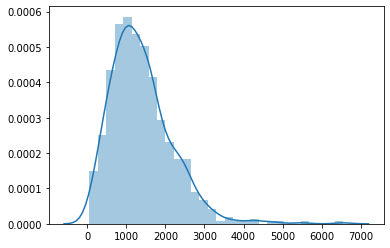

In [23]:
sns.distplot(df_time)